## Prepare data

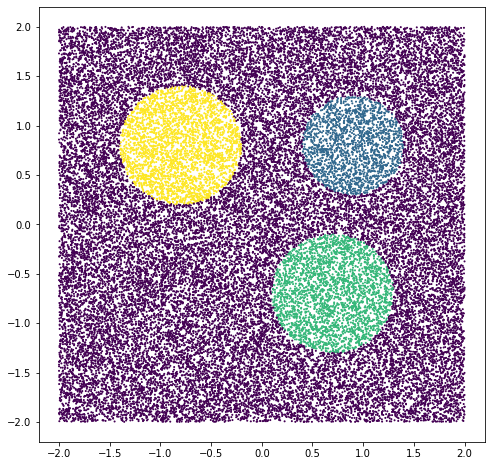

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
%matplotlib inline
#Prepare data
N=40000
L=4
X = L*np.random.rand(N,2) 
X[:,0] = X[:,0]-L/2
X[:,1] = X[:,1]-L/2

Y = np.zeros(N)

for i in range(N):
    if (X[i,0]-0.9)**2+(X[i,1]-0.8)**2<0.25:
        Y[i]=1
    elif (X[i,0]-0.7)**2+(X[i,1]+0.7)**2<0.36:
        Y[i]=2
    elif (X[i,0]+0.8)**2+(X[i,1]-0.8)**2<0.36:
        Y[i]=3
    else:
        Y[i]=0
        
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:, 1], s=1, c=Y)
plt.show()

data = X
labels = to_categorical(Y)

In [2]:
import activation_plot as aplt

hid_layer_units = [5,5]
model = aplt.prepare_model(hid_layer_units,n_category=len(labels[0]))
model_name = ''.join(str(e) for e in hid_layer_units)+'2'
model.save(model_name+'_model.h5')

In [4]:

data_activation_color 

array([[0.        , 0.09411765, 0.28235294],
       [0.        , 0.09411765, 0.28235294],
       [0.        , 0.09411765, 0.28235294],
       ...,
       [0.72156863, 0.0627451 , 0.37647059],
       [0.72156863, 0.0627451 , 0.37647059],
       [0.72156863, 0.0627451 , 0.37647059]])

In [3]:
layer_output_functions = aplt.get_layer_output_functions(model)
X_test = aplt.data_grid(200,2)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
colors = aplt.get_color(X_test)

activations = aplt.get_data_activation(X_test,layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

In [6]:
model.fit(data, labels, epochs=10,batch_size=32)

W0829 09:26:43.786923 139897723668288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples
Epoch 1/10
40000/40000 [==============================] - 2s 53us/sample - loss: 0.6488 - categorical_accuracy: 0.7498
Epoch 2/10
40000/40000 [==============================] - 2s 48us/sample - loss: 0.3787 - categorical_accuracy: 0.8112
Epoch 3/10
40000/40000 [==============================] - 2s 46us/sample - loss: 0.2944 - categorical_accuracy: 0.8497
Epoch 4/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.2382 - categorical_accuracy: 0.9042
Epoch 5/10
40000/40000 [==============================] - 2s 49us/sample - loss: 0.2000 - categorical_accuracy: 0.9273
Epoch 6/10
40000/40000 [==============================] - 2s 51us/sample - loss: 0.1715 - categorical_accuracy: 0.9396
Epoch 7/10
40000/40000 [==============================] - 2s 52us/sample - loss: 0.1500 - categorical_accuracy: 0.9467
Epoch 8/10
40000/40000 [==============================] - 2s 52us/sample - loss: 0.1340 - categorical_accuracy: 0.9517
Epoch 9/10
40000/40000 [=

In [3]:
from tensorflow.keras import backend as K

layer_output_functions = aplt.get_layer_output_functions(model)

X_test = aplt.data_grid(200,2)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
colors = aplt.get_color(X_test)

activations = aplt.get_data_activation(X_test,layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

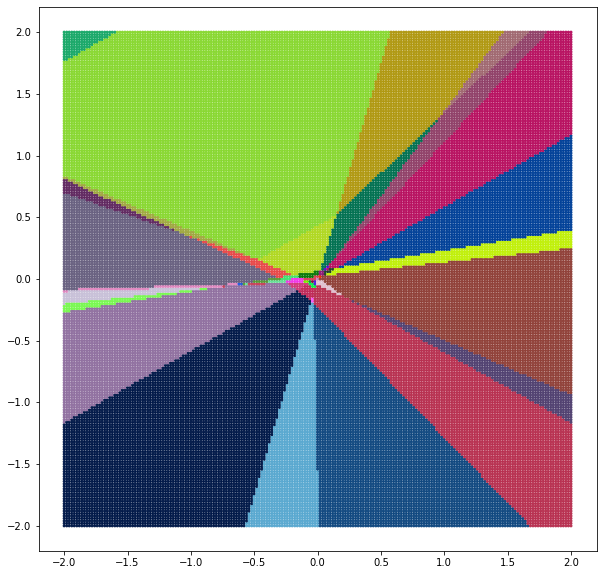

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.show()
plt.close()

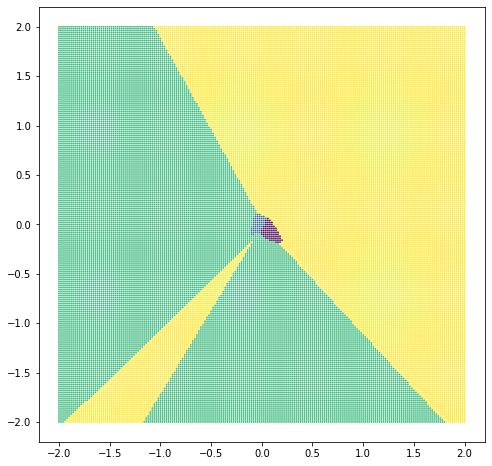

In [5]:
#test
import numpy as np

X_test = aplt.data_grid(200,2)
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=0.5,alpha=1)
plt.show()
plt.close()

In [7]:
from tensorflow.keras.models import load_model

model_copy = load_model(model_name+'_model.h5')

In [8]:
A,b = model_copy.layers[0].get_weights()
A = np.transpose(A)
#model_copy.layers[1].set_weights([A,b])

In [9]:
model_copy.layers[1].get_weights()

[array([[ 0.19710237, -0.29368845,  0.04352385,  0.5759661 ],
        [ 0.6487677 ,  0.1053952 , -0.59223616,  0.353621  ],
        [ 0.27306432, -0.38132685,  0.07304043, -0.0766902 ],
        [ 0.27435648,  0.00233465,  0.20537716,  0.08072132],
        [-0.18390346, -0.5742667 ,  0.4060012 ,  0.60585725],
        [-0.10613674, -0.01765579,  0.33163232,  0.27831894],
        [-0.5425011 ,  0.31593835, -0.10681039,  0.53405166],
        [-0.17029455, -0.2318294 ,  0.5498321 , -0.34260193],
        [-0.26967934, -0.1256187 ,  0.47838116,  0.10633075],
        [-0.30376726, -0.34664646, -0.4448452 ,  0.6429608 ]],
       dtype=float32),
 array([-0.00391918,  0.03305704, -0.02369337, -0.0484483 ], dtype=float32)]

In [17]:
model_copy.fit(data, labels, epochs=10,batch_size=32)

Train on 40000 samples
Epoch 1/10
40000/40000 [==============================] - 2s 51us/sample - loss: 0.6494 - categorical_accuracy: 0.7490
Epoch 2/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.3770 - categorical_accuracy: 0.8112
Epoch 3/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.2931 - categorical_accuracy: 0.8503
Epoch 4/10
40000/40000 [==============================] - 2s 51us/sample - loss: 0.2373 - categorical_accuracy: 0.9037
Epoch 5/10
40000/40000 [==============================] - 2s 49us/sample - loss: 0.1988 - categorical_accuracy: 0.9270
Epoch 6/10
40000/40000 [==============================] - 2s 49us/sample - loss: 0.1702 - categorical_accuracy: 0.9397
Epoch 7/10
40000/40000 [==============================] - 2s 49us/sample - loss: 0.1494 - categorical_accuracy: 0.9466
Epoch 8/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.1336 - categorical_accuracy: 0.9510
Epoch 9/10
40000/40000 [=

In [12]:
from tensorflow.keras import backend as K

layer_output_functions = aplt.get_layer_output_functions(model_copy)

X_test = aplt.data_grid(200,6)
Y_test = model_copy.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
colors = aplt.get_color(X_test)

activations = aplt.get_data_activation(X_test,layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

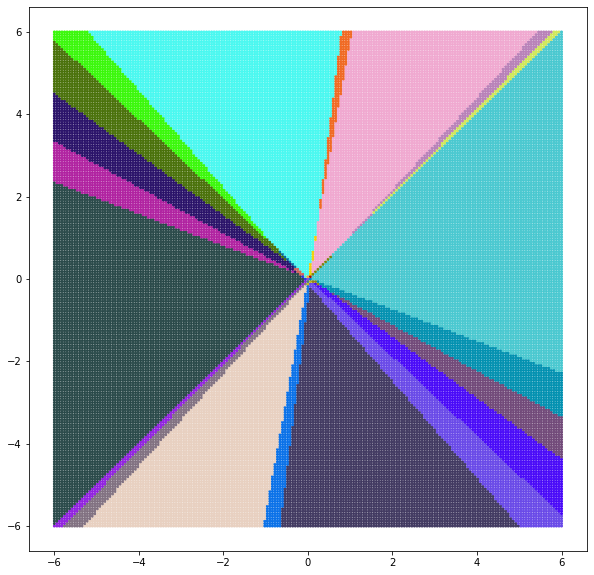

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.show()
plt.close()

# Plot line

In [61]:
A = np.transpose(A)

In [10]:
A

array([[ 0.16551203,  0.42960793],
       [ 0.3149398 ,  0.2675991 ],
       [ 0.65415937, -0.6533335 ],
       [-0.35939544, -0.6446033 ],
       [ 0.5647723 , -0.5441885 ],
       [ 0.46124047,  0.62371856],
       [-0.7037379 ,  0.08459949],
       [-0.5498488 ,  0.4914096 ],
       [-0.6928227 ,  0.12082726],
       [ 0.61562115,  0.6410871 ]], dtype=float32)

In [14]:
b[5:] = np.linspace(-4,4,5)

In [15]:
b

array([-1.6740859e-02,  3.2240298e-02,  3.4268025e-02, -2.5867298e-04,
        6.7231804e-04, -4.0000000e+00, -2.0000000e+00,  0.0000000e+00,
        2.0000000e+00,  4.0000000e+00], dtype=float32)

In [47]:
x

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

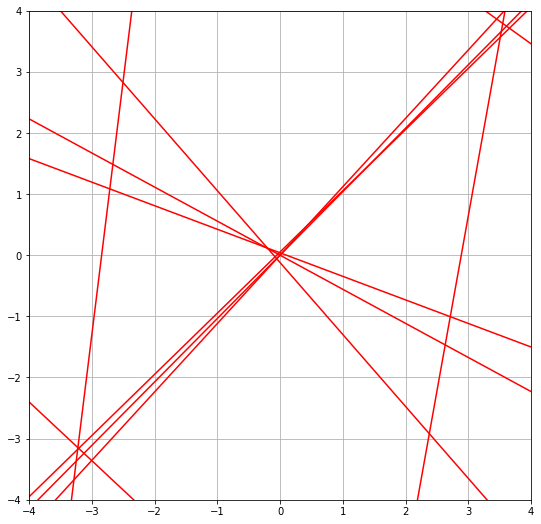

In [16]:
L = 4
x = np.linspace(-L,L,100)
Y = []
for i in range(hid_layer_units[0]):
    y = -A[i,0]/A[i,1]*x+-b[i]/A[i,1]
    Y.append(y)

plt.figure(figsize=(9, 9))
for i in range(10):
    plt.plot(x, Y[i], '-r')    
plt.xlim(-L,L)
plt.ylim(-L,L)
plt.grid()
plt.show()

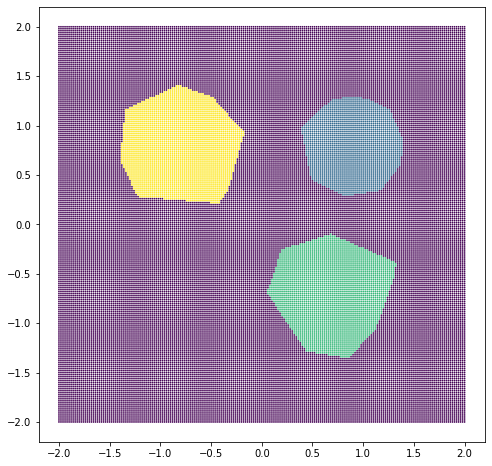

In [75]:
#test
import numpy as np

X_test = aplt.data_grid(200,2)
Y_test = model_copy.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=0.5,alpha=1)
plt.show()
plt.close()